# readme
descrip: plot SSH and surface velocity (historic time: 1993-2019, same time as CMEMS obs) for obs, Sunway LR and HR in the North Atlantic to show Gulf Stream is too close to the US east coast in LR

update history: <br>
v1.0 DL 2021Apr29 <br>
v1.1 DL 2021May07 make publication-ready pics <br>
v1.2 DL 2021May19 use 0.25-deg CMEMS (AVISO) ADT and Vgo data <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe
# import seawater as sw

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# import Funcs4SeaLevelCESM 

# incorporate dask 

In [2]:
client = Client("tcp://10.73.2.193:36597")
client

Client Scheduler: tcp://10.73.2.193:36597 Dashboard: http://10.73.2.193:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# read data

In [3]:
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -85, -15 # 85W - 15W 
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSHsfcVelHistNorthAtlanticSunwayCMEMS_2021May19.png'

read HR SSH and velocity files 

In [4]:
#TH: transient HR
infile1_ssh_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')

infile1_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
  'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
  'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.sfcUVVEL_1993-2019av_2021May19.nc')

infile0_TH = ('/scratch/group/ihesp/archive/'
              'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/'
              'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

chunk_size_HR = {'nlat':400,'nlon':200}
ds_ssh_TH = xr.open_dataset(infile1_ssh_TH,chunks=chunk_size_HR)
ds_vel_TH=xr.open_dataset(infile1_vel_TH, chunks=chunk_size_HR)
ds0_TH = xr.open_dataset(infile0_TH, chunks=chunk_size_HR)
ds_vel_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Coordinates:
    z_t      float32 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 dask.array<chunksize=(400, 200), meta=np.ndarray>
    VVEL     (nlat, nlon) float32 dask.array<chunksize=(400, 200), meta=np.ndarray>

read LR SSH and vel files

In [5]:
# TL: transient LR
infile1_ssh_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')

infile1_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.sfcUVVEL_1993-2019av_2021May19.nc')

infile0_TL = ('/scratch/group/ihesp/archive/'
              'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
        'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')

chunk_size_LR = {'nlat':384,'nlon':320}
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunk_size_LR)
ds_vel_TL=xr.open_dataset(infile1_vel_TL, chunks=chunk_size_LR)
ds0_TL = xr.open_dataset(infile0_TL,chunks=chunk_size_LR)
ds_vel_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Coordinates:
    z_t      float32 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    VVEL     (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>

read CMEMS obs files

In [6]:
infile_obs=('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
              'data_after_manipulation/ADT_Vgeo_CMEMS/'
              'dt_global_allsat_phy_l4_1993-2019_2021May18.nc')
ds_obs = xr.open_dataset(infile_obs)
ds_obs = ds_obs.rename({'longitude': 'lon', 'latitude': 'lat'})
ds_obs

<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440, nv: 2, time: 27)
Coordinates:
  * time      (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * nv        (nv) int32 0 1
Data variables:
    crs       (time) float64 ...
    lat_bnds  (time, lat, nv) float32 ...
    lon_bnds  (time, lon, nv) float32 ...
    err       (time, lat, lon) float64 ...
    adt       (time, lat, lon) float64 ...
    ugos      (time, lat, lon) float64 ...
    vgos      (time, lat, lon) float64 ...
    sla       (time, lat, lon) float64 ...
    ugosa     (time, lat, lon) float64 ...
    vgosa     (time, lat, lon) float64 ...

read files for regriding

In [7]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
# ds0_g16

infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
# ds0_t12

ds_1deg = xe.util.grid_global(1, 1)

ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_1deg = ('/scratch/group/ihesp/user/dapengli/'
                       'Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_t12_1deg = xe.Regridder(ds0_t12_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_t12_1deg, reuse_weights=True)

ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
weightfile_g16_1deg = ('/scratch/group/ihesp/user/dapengli/'
                       'Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_g16_1deg = xe.Regridder(ds0_g16_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_g16_1deg, reuse_weights=True)

# ds_obs_rn = ds_obs.rename({'longitude': 'lon', 'latitude': 'lat'}) # rn: rename
weightfile_g16_1deg = ('/scratch/user/dapengli/Projects4iHESP/'
                       'Project_SeaLevelUSEastCoast_2021Mar30/python_scripts/'
                       'bilinear_std0.25deg_1degGlobalRectlinear_periodic_2021May19.nc')
regridder_025deg_1deg = xe.Regridder(ds_obs, ds_1deg, method='bilinear', periodic=True, 
            filename=weightfile_g16_1deg, reuse_weights=True)

# data analysis

subtract global mean SSH

<xarray.DataArray 'adt' (time: 27)>
array([0.41643557, 0.42268535, 0.4208776 , 0.4262029 , 0.42739927,
       0.4306791 , 0.43285581, 0.43550331, 0.44026674, 0.44220708,
       0.44952976, 0.44919307, 0.45127163, 0.4525002 , 0.45331965,
       0.45677367, 0.46073006, 0.46172916, 0.46103048, 0.47121863,
       0.47348148, 0.47674267, 0.48556625, 0.48816706, 0.48905696,
       0.49137853, 0.49766346])
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31

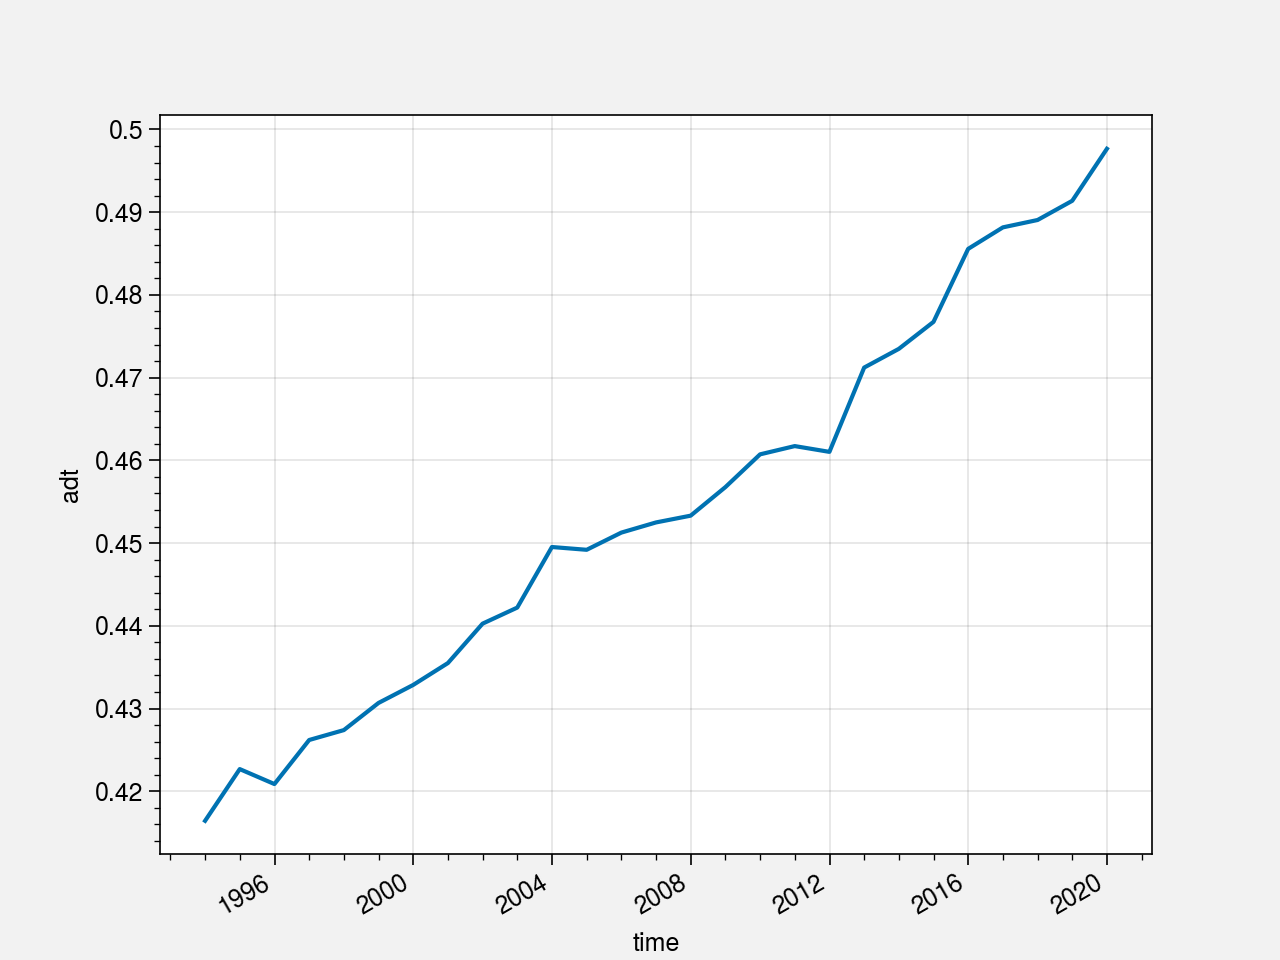

In [8]:
weights_obs = np.cos(np.deg2rad(ds_obs.lat))
weights_obs.name = "weights_obs"
ssh_gl_av_obs = ds_obs.adt.weighted(weights_obs).mean(("lon", "lat")) # unit: m
ssh_gl_av_obs.plot()
ssh_gl_av_obs

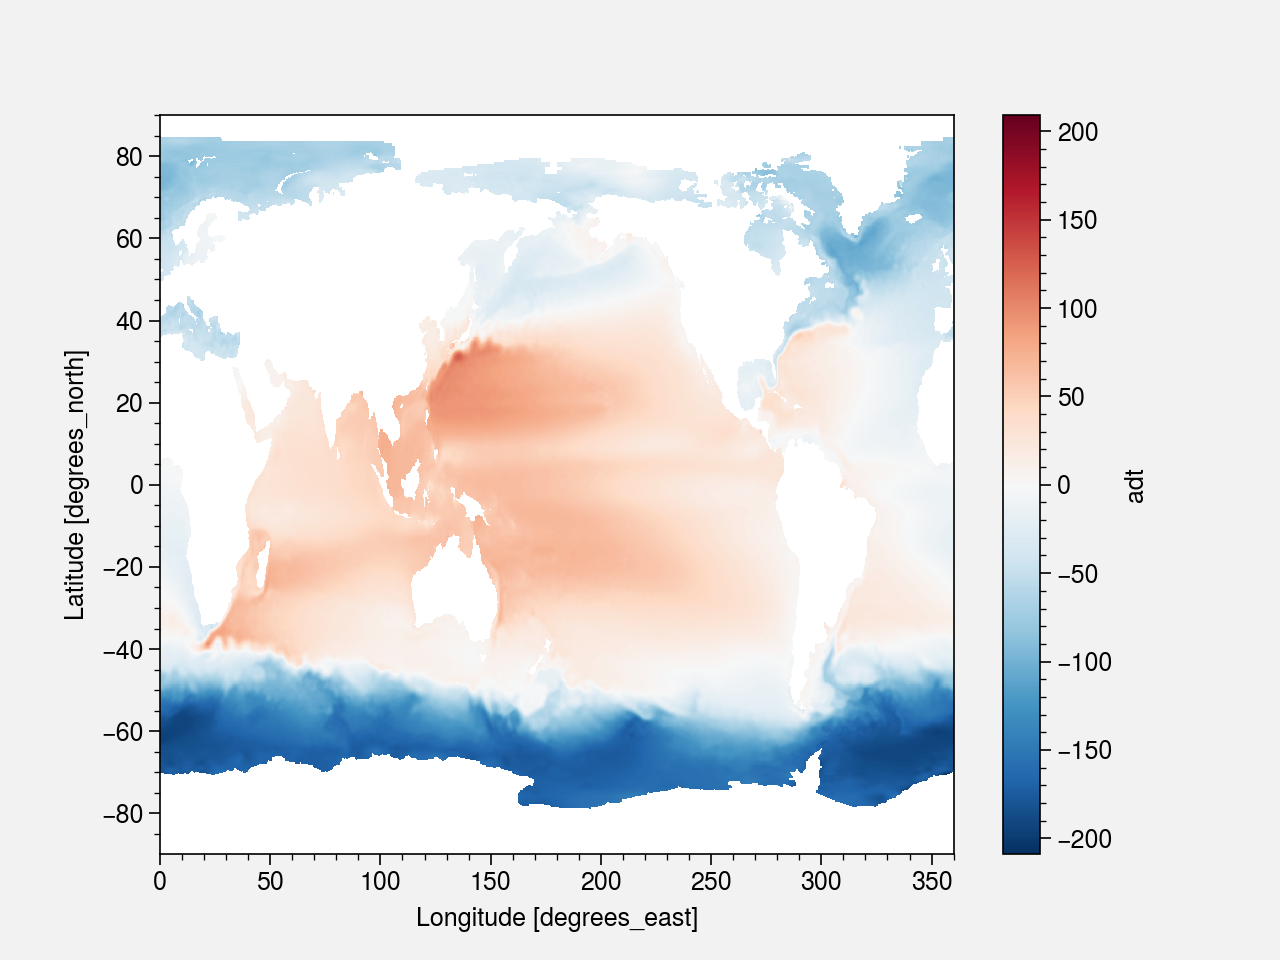

In [9]:
ssh1_obs=(ds_obs.adt-ssh_gl_av_obs).sel(time=slice('1993','2019')).mean('time')*100 
# unit: cm
ssh1_obs.plot()

In [10]:
# it takes too long to compute global-av SSH, I put calculation results in the appendix
# Sunway TR HR global-av SSH (cm) is -0.215
# Sunway TR LR global-av SSH (cm) is -5.80926295e-05
# ssh_gl_av_TH = ds_ssh_TH.SSH.weighted(ds0_t12.TAREA).mean(("nlon", "nlat"))
# ssh_gl_av_TL = ds_ssh_TL.SSH.weighted(ds0_g16.TAREA).mean(("nlon", "nlat"))
# # 5-yr is enough since POP is volume conserved, volume does not change
# print('Sunway TR HR global-av SSH (cm):')
# print(ssh_gl_av_TH.sel(time=slice('1993','1997')).values) 
# print('Sunway TR LR global-av SSH (cm):')
# print(ssh_gl_av_TL.sel(time=slice('1993','1997')).values) 

In [11]:
ssh1_TH = ds_ssh_TH.SSH.sel(time=slice('1993','2019')).mean('time').where(
    ds0_t12.KMT>0, np.nan)+0.215 
# mask land with nan and subtract global mean of -0.215 cm
ssh1_TH = ssh1_TH.compute()

ssh1_TL = ds_ssh_TL.SSH.sel(time=slice('1993','2019')).mean('time').where(
    ds0_g16.KMT>0, np.nan)
ssh1_TL = ssh1_TL.compute() 
# mask land with nan, no need to subtract offset for LR cause it's too small

In [12]:
ds_vel_TH.UVEL # only has nlat and nlon dims

<xarray.DataArray 'UVEL' (nlat: 2400, nlon: 3600)>
dask.array<open_dataset-fdb91fee8fe290ade4e2b491182b3e25UVEL, shape=(2400, 3600), dtype=float32, chunksize=(400, 200), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 ...
Dimensions without coordinates: nlat, nlon

In [13]:
u1_TH = ds_vel_TH.UVEL.where(ds0_TH.KMT>0, np.nan).compute()/100 # [m/s]
v1_TH = ds_vel_TH.VVEL.where(ds0_TH.KMT>0, np.nan).compute()/100 # [m/s]

u1_TL = ds_vel_TL.UVEL.where(ds0_TL.KMT>0, np.nan).compute()/100 # [m/s]
v1_TL = ds_vel_TL.VVEL.where(ds0_TL.KMT>0, np.nan).compute()/100 # [m/s]

u1_obs = ds_obs.ugos.sel(time=slice('1993','2019')).mean('time') # [m/s]
v1_obs = ds_obs.vgos.sel(time=slice('1993','2019')).mean('time') # [m/s]

regrid SSH and sfc vel

In [14]:
ssh1_rgd_TH = regridder_t12_1deg(ssh1_TH)
u1_rgd_TH = regridder_t12_1deg(u1_TH)
v1_rgd_TH = regridder_t12_1deg(v1_TH)

ssh1_rgd_TL = regridder_g16_1deg(ssh1_TL)
u1_rgd_TL = regridder_g16_1deg(u1_TL)
v1_rgd_TL = regridder_g16_1deg(v1_TL)

ssh1_rgd_obs = regridder_025deg_1deg(ssh1_obs)
u1_rgd_obs = regridder_025deg_1deg(u1_obs)
v1_rgd_obs = regridder_025deg_1deg(v1_obs)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


choose North Atlantic 

In [15]:
ssh1_rgd_NA_TH = ssh1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
u1_rgd_NA_TH = u1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
v1_rgd_NA_TH = v1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

ssh1_rgd_NA_TL = ssh1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
u1_rgd_NA_TL = u1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
v1_rgd_NA_TL = v1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

ssh1_rgd_NA_obs = ssh1_rgd_obs.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
u1_rgd_NA_obs = u1_rgd_obs.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)
v1_rgd_NA_obs = v1_rgd_obs.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                               (ds_1deg.lon>lon1) & (ds_1deg.lon<lon2), drop=True)

# make pics

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


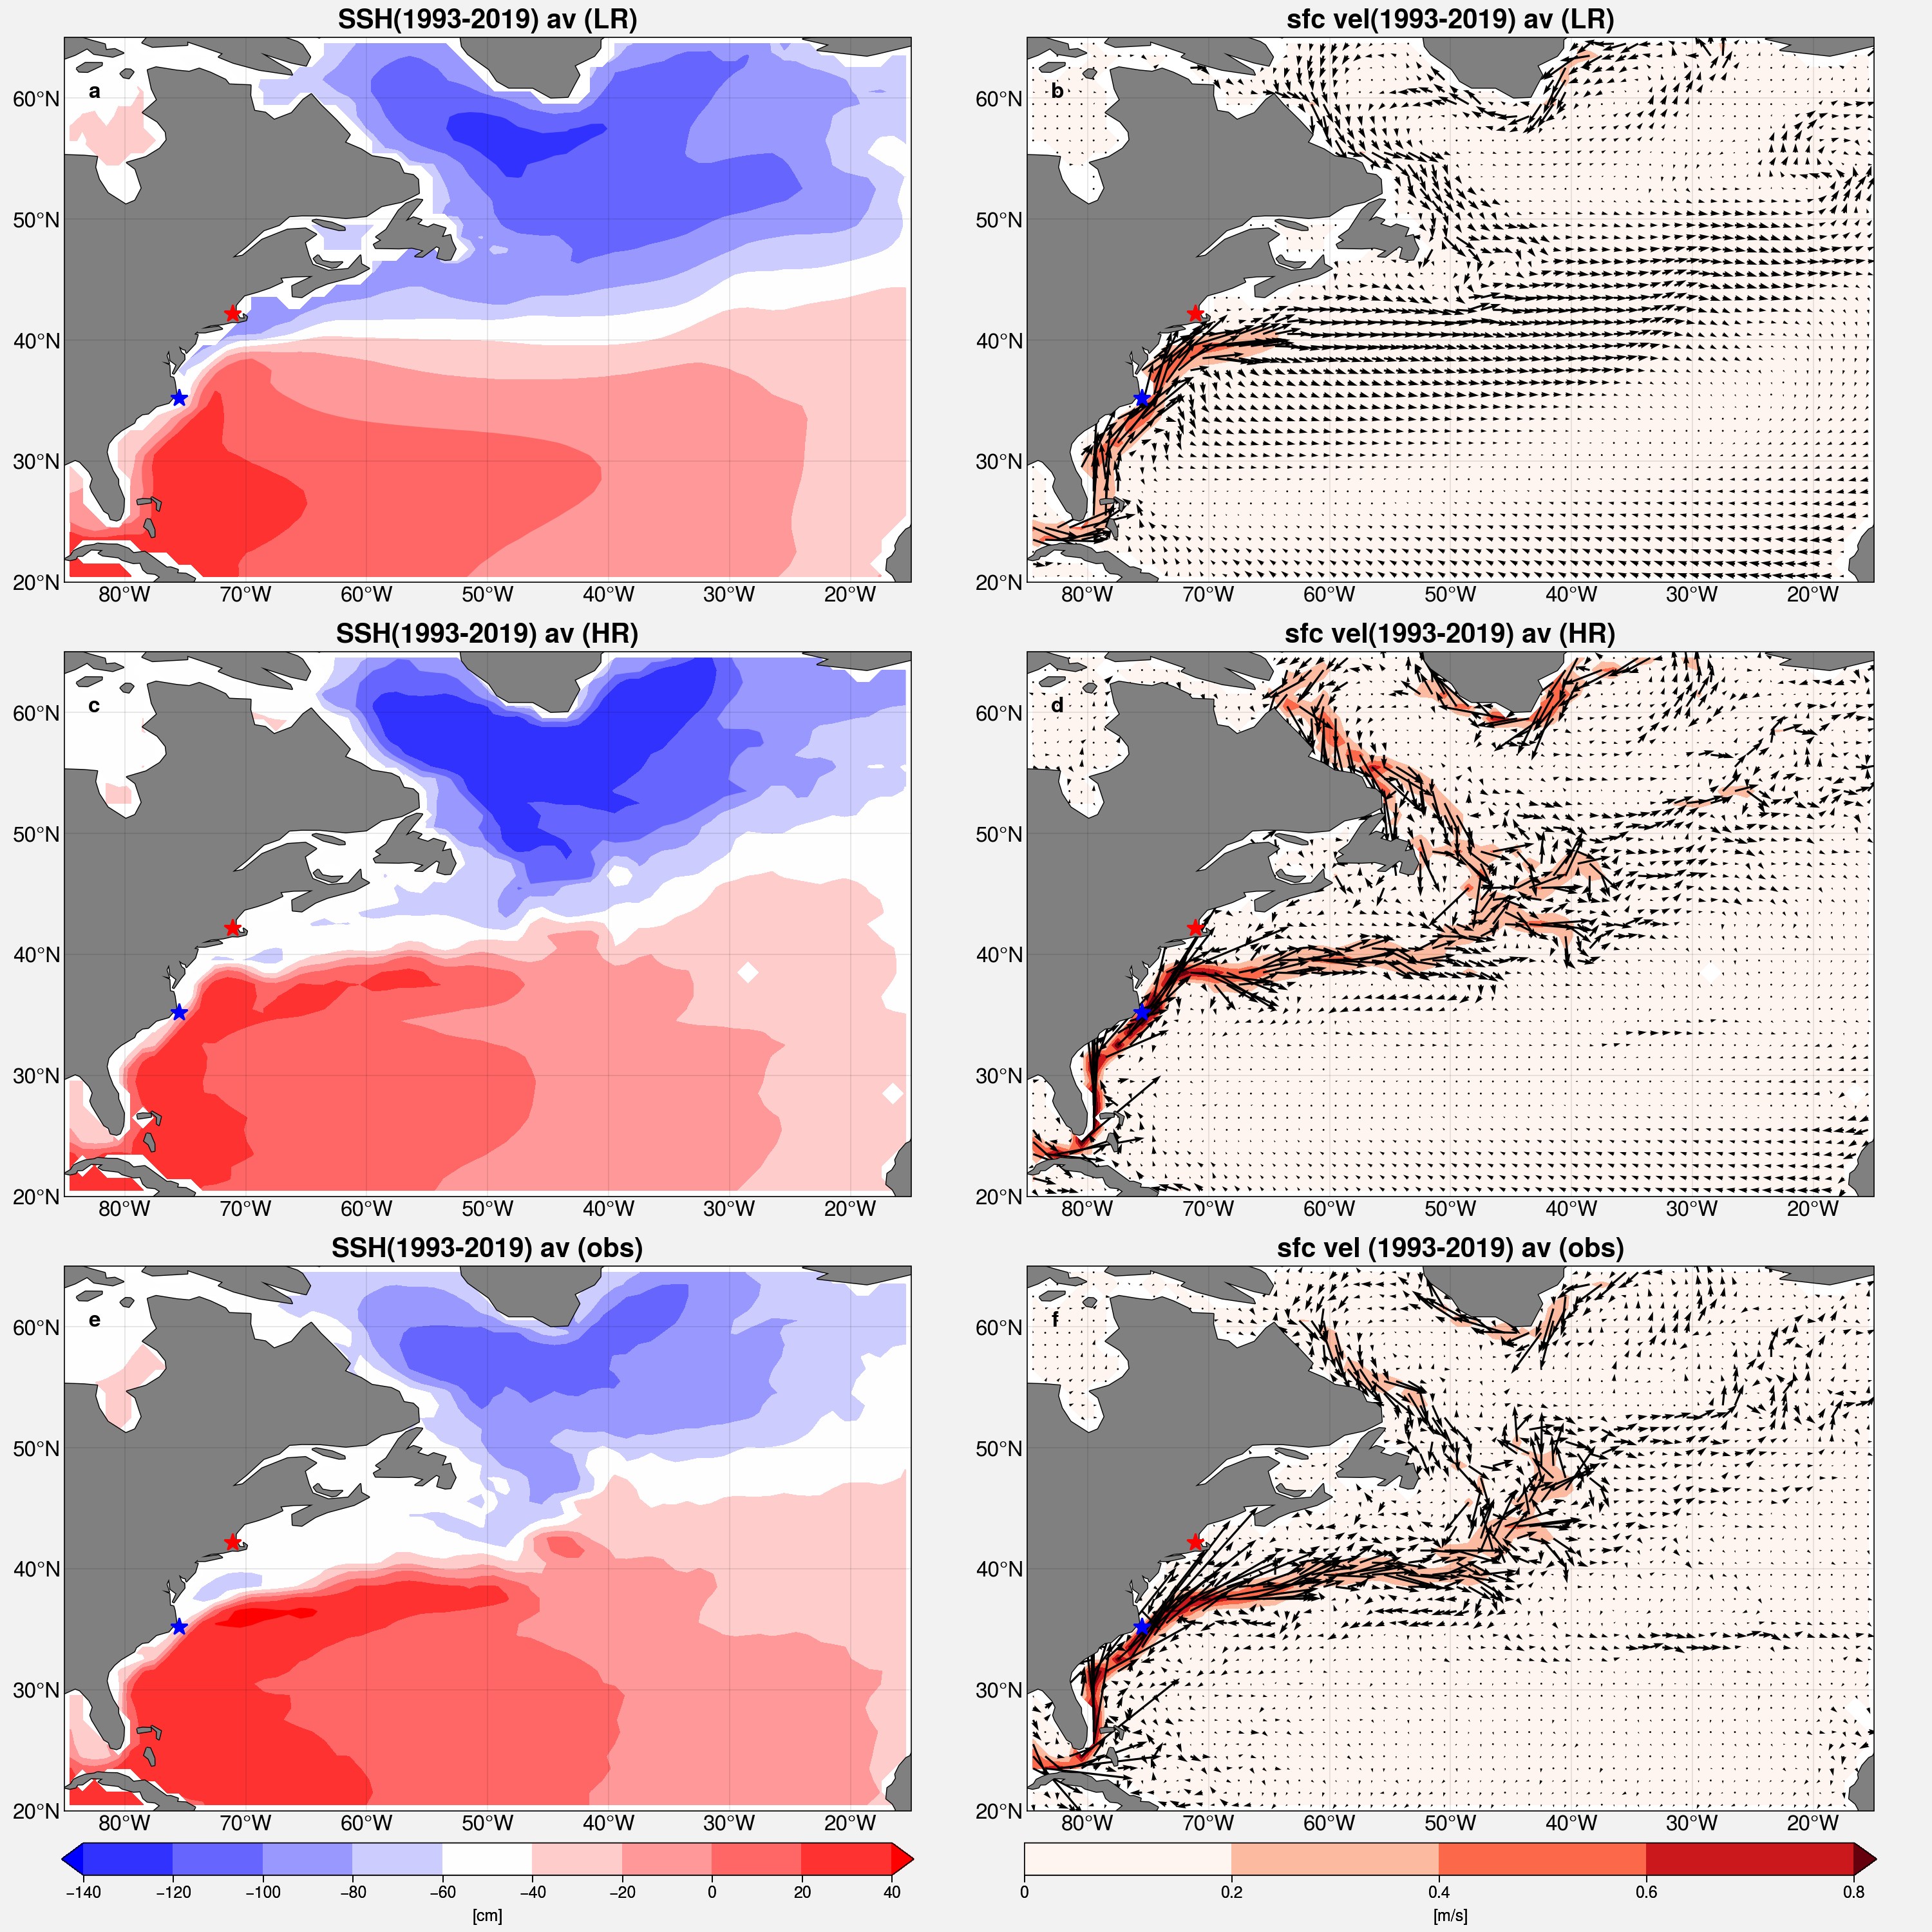

In [16]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='15in',height='15in')

m00=axs[0,0].contourf(ssh1_rgd_NA_TL.lon, ssh1_rgd_NA_TL.lat, 
        ssh1_rgd_NA_TL, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
# axs[0,0].quiver(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
#                 u1_rgd_NA_TL, v1_rgd_NA_TL, transform=pc,color='k')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatteras (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH(1993-2019) av (LR)', fontsize=15, fontweight='bold')
axs[0,0].text(-83, 60, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

m01=axs[0,1].contourf(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
        xr.ufuncs.sqrt(u1_rgd_NA_TL**2+v1_rgd_NA_TL**2), transform=pc,
        levels=np.arange(0,0.8+0.1,0.2),vmin=0,vmax=0.8,extend='max',cmap='Reds')
axs[0,1].quiver(u1_rgd_NA_TL.lon, u1_rgd_NA_TL.lat, 
                u1_rgd_NA_TL, v1_rgd_NA_TL, transform=pc,color='k')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatteras (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('sfc vel(1993-2019) av (LR)', fontsize=15, fontweight='bold')
axs[0,1].text(-83, 60, 'b', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,1].colorbar(m01,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)


m10=axs[1,0].contourf(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, 
        ssh1_rgd_NA_TH, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
# axs[0,1].quiver(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
#                 u1_rgd_NA_TH, v1_rgd_NA_TH, transform=pc,color='k')
axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatteras (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[1,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('SSH(1993-2019) av (HR)', fontsize=15, fontweight='bold')
axs[1,0].text(-83, 60, 'c', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[1,0].colorbar(m10,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

m11=axs[1,1].contourf(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
        xr.ufuncs.sqrt(u1_rgd_NA_TH**2+v1_rgd_NA_TH**2), transform=pc,
        levels=np.arange(0,0.8+0.1,0.2),vmin=0,vmax=0.8,extend='max',cmap='Reds')
axs[1,1].quiver(u1_rgd_NA_TH.lon, u1_rgd_NA_TH.lat, 
                u1_rgd_NA_TH, v1_rgd_NA_TH, transform=pc,color='k')
axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatteras (75.5W, 35.2N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,1].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[1,1].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[1,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('sfc vel(1993-2019) av (HR)', fontsize=15, fontweight='bold')
axs[1,1].text(-83, 60, 'd', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[1,1].colorbar(m11,loc='r',label='[m/s]',extend='both',width='2em',shrink=1)


m20=axs[2,0].contourf(ssh1_rgd_NA_obs.lon, ssh1_rgd_NA_obs.lat, 
        ssh1_rgd_NA_obs, levels=np.arange(-140,40+1,20), transform=pc, 
        vmin=-140, vmax=40, cmap="bwr", extend='both')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[2,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatteras (75.5W, 35.2N)
axs[2,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[2,0].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[2,0].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[2,0].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('SSH(1993-2019) av (obs)', fontsize=15, fontweight='bold')
axs[2,0].text(-83, 60, 'e', transform=pc, fontsize=12, fontweight='bold')
# Now adding the colorbar
cb = axs[2,0].colorbar(m20,loc='b',label='[cm]',extend='both',width='2em',shrink=0.9)

m21=axs[2,1].contourf(u1_rgd_NA_obs.lon, u1_rgd_NA_obs.lat, 
        xr.ufuncs.sqrt(u1_rgd_NA_obs**2+v1_rgd_NA_obs**2), transform=pc,
        levels=np.arange(0,0.8+0.1,0.2),vmin=0,vmax=0.8,extend='max',cmap='Reds')
axs[2,1].quiver(u1_rgd_NA_obs.lon, u1_rgd_NA_obs.lat,
                u1_rgd_NA_obs, v1_rgd_NA_obs, transform=pc,color='k')
axs[2,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[2,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[2,1].set_xticks(np.arange(-80,-20+1,10), crs=pc)
axs[2,1].set_xticklabels(np.arange(-80,-20+1,10), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[2,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('sfc vel (1993-2019) av (obs)', fontsize=15, fontweight='bold')
axs[2,1].text(-83, 60, 'f', transform=pc, fontsize=12, fontweight='bold')
cb = axs[2,1].colorbar(m21,loc='b',label='[m/s]',width='2em',shrink=0.9)

fig1.savefig(pic1,bbox_inches='tight')

# Appendix

In [17]:
ssh_gl_av_TH = ds_ssh_TH.SSH.weighted(ds0_t12.TAREA).mean(("nlon", "nlat"))
ssh_gl_av_TL = ds_ssh_TL.SSH.weighted(ds0_g16.TAREA).mean(("nlon", "nlat"))
# 5-yr is enough since POP is volume conserved, volume does not change
print('Sunway TR HR global-av SSH (cm):')
print(ssh_gl_av_TH.sel(time=slice('1993','1997')).values) 
print('Sunway TR LR global-av SSH (cm):')
print(ssh_gl_av_TL.sel(time=slice('1993','1997')).values) 

Sunway TR HR global-av SSH (cm):
[-0.21559982 -0.21559917 -0.21559798 -0.21559687 -0.21559627 -0.21559592
 -0.21559549 -0.21559535 -0.2155953  -0.21559502 -0.21559463 -0.21559427
 -0.21559369 -0.21559325 -0.21559264 -0.21559186 -0.21559076 -0.21558981
 -0.21558856 -0.21558722 -0.21558617 -0.21558525 -0.2155843  -0.21558278
 -0.21558053 -0.21557947 -0.21557918 -0.21557828 -0.21557822 -0.21557838
 -0.21557826 -0.21557766 -0.21557717 -0.21557653 -0.21557593 -0.21557546
 -0.21557526 -0.21557487 -0.21557529 -0.21557524 -0.2155747  -0.21557465
 -0.21557445 -0.21557393 -0.21557303 -0.21557196 -0.21557082 -0.21556928
 -0.21556785 -0.21556657 -0.21556516 -0.21556334 -0.21556176 -0.21556078
 -0.21556002 -0.21555993 -0.21556042 -0.21556096 -0.21556101 -0.21556081]
Sunway TR LR global-av SSH (cm):
[-5.80926295e-05 -5.79844653e-05 -5.79686641e-05 -5.80212662e-05
 -5.80668051e-05 -5.81370048e-05 -5.81198157e-05 -5.80966436e-05
 -5.81331400e-05 -5.81264909e-05 -5.81249695e-05 -5.80828307e-05
 -5.8119